<a href="https://colab.research.google.com/github/BedinEduardo/Colab_Repositories/blob/master/PyTorch_Documentation_Introduction_to_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to PyTorch - YouTube Series

## Running the Tutorial Code

* **On the Cloud**:
* **Locally**:

## Introduction to PyTorch

Follow along with the video below or on [YouTube](https://www.youtube.com/watch?v=IC0_FRiX-sw)

* What is **PyTorch**: An open source machine learning framework that accelerates the path from research prototyping to production deployment.
* **Machine Learning Framework**:
  * DL primitives, NN layers types, activation and loss functions, optimizers
  * **Research Prototyping**:
    * Models are Python code, Autograd and "eager mode" for dynamic model architectures
  * **Product Deployment**:
    * TorchScript, TorchServe, quantization
  * **Open Source**

### Tensors

### Autograd

**Automatic Differentiation Engine**: Computation as a *graph buiilt at run time*

Gradient w.r.t the input Tensors is computed step-by-step from **loss** to top reverse.

### Building Models in PyTorch

### Datasets and DataLoaders

Datasets get the data, standard or own dataset, and DataLoader is an 'organizer' of the data.

### Training Your PyTorch Model

### Deployment With TorchScript

Connect to a system to connect the model to the world.

**TorchScript**: A static, High-Performance subset of Python
1. Prototype your model with PyTorch
2. Control flow is preserved
3. First-class support for lists, dicts, etc.

**PyTorch JIT**: An optmizing just-in-time compiler for PyTorch programs
1. Lightweight, thread-safe interpreter
2. Easy to write custom transformations
3. Not just for inference! Autodiff support.




## PyTorch Tensors

In [ ]:
import torch

Let's see a few basic tensor multiplications. First, just a few of the ways to build tensors

In [ ]:
z = torch.zeros(5,3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


The defualt of PyTorhc is build a 32-bit floating point numbers

In [ ]:
i = torch.ones((5,3), dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


It is common to initialize learning weights randomly, often with a specific seed fot the PRNG for reproducibility of results.

In [ ]:
torch.manual_seed(1311)
r1 = torch.rand(2,2)
print("Random tensor \n")
print(r1)

Random tensor 

tensor([[0.3833, 0.0483],
        [0.3644, 0.8854]])


In [ ]:
r2 = torch.rand(2,2)

print(r2)

tensor([[0.0847, 0.5025],
        [0.7393, 0.8959]])


In [ ]:
torch.manual_seed(1311)
r3 = torch.rand(2,2)

print(r3)

tensor([[0.3833, 0.0483],
        [0.3644, 0.8854]])


PyTorch tensors perform arithmetic operations intuitively. Tensors of similar shapes may be added, multiplied, etc. Operations with scalars are distributed over the tensor:

In [ ]:
ones = torch.ones(2,3)
print(ones)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [ ]:
twos = torch.ones(2,3)
print(twos)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [ ]:
threes = ones + twos
print(threes)
print(threes.shape)

tensor([[2., 2., 2.],
        [2., 2., 2.]])
torch.Size([2, 3])


In [ ]:
r1 = torch.rand(2,3)
r2 = torch.rand(3,2)

r3 = r1 + r2.T
print(r3)

tensor([[0.3563, 1.1770, 1.7332],
        [1.7644, 1.3273, 0.5693]])


Here is a small smaple of the mathematical operations available:

In [ ]:
r = (torch.rand(2,2)-0.5)*2
print(r)

tensor([[ 0.0315, -0.3269],
        [ 0.2884, -0.0202]])


In [ ]:
print("\n Absolute value of r:")
print(torch.abs(r))   #turn all values in positive values


 Absolute value of r:
tensor([[0.0315, 0.3269],
        [0.2884, 0.0202]])


In [ ]:
# trigonometric functions
print("\n Inverse sine of r: ")
print(torch.asin(r))


 Inverse sine of r: 
tensor([[ 0.0315, -0.3330],
        [ 0.2925, -0.0202]])


In [ ]:
# ... and linear algebra operations like determinant and singular value decomposition
print('\nDeterminant of r: ')
print(torch.det(r))
print("\nSingular value decomposition of r: ")
print(torch.svd(r))



Determinant of r: 
tensor(0.0936)

Singular value decomposition of r: 
torch.return_types.svd(
U=tensor([[-0.8978, -0.4403],
        [-0.4403,  0.8978]]),
S=tensor([0.3399, 0.2754]),
V=tensor([[-0.4566,  0.8897],
        [ 0.8897,  0.4566]]))


In [ ]:
# ... and statistical and aggregate operations
print("\n Average and standard deviation of r")
print(torch.std_mean(r))
print("\nMaximum value of r: ")
print(torch.max(r))


 Average and standard deviation of r
(tensor(0.2525), tensor(-0.0068))

Maximum value of r: 
tensor(0.2884)


## PyTorch Models

In [ ]:
import torch  # for all things in PyTorch
import torch.nn as nn    # For torch.nn.Module, the parent object for PyTorch models
import torch.nn.functional as F


![LeNet.png](https://pytorch.org/tutorials/_images/mnist.png)

Here is the abridged version of how ot works:

* Layer C1 is a convolutional Layer, meaning that it scans the input for features it learned during training. It outputs a map of where it saw each of its learned features in the image. This "activation map" is downsampled in layer S2.
* Layer C3 is another Convolutional layers, this time scanning C1's activation map for combinations of features. It also puts out in activation map describing the spatial locations of these features combinations, which is downsampled in layere S4.
* Finally, the fully-connected layers at the end, F5, F6, and OUTPUT, are a classifier that takes the final activation map, and classifies it into one of ten bins representing 10 digits.

How to express thrugh code this simple NN?

In [ ]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet,self).__init__()
    # 1 input image channel - brack and white - 6 output channel, 5x5 square convolution kernel
    self.conv1 = nn.Conv2d(1,6,5)
    self.conv2 = nn.Conv2d(6,16,5)
    # an afine operation: y = Wx + b
    self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 form image dimension
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self, x):
    # Max pooling over a (2,2) windown
    x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))  #if the size is a square you can only specify a single number
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)

    return x

  def num_flat_features(self, x):
    size = x.size()[1:]  # all dimensions except the batch dimension
    num_features = 1
    for s in size:
      num_features *= s

    return num_features

Looking over this code, you should be able to spot some structural similarities with the diagram above.

This demostrate the structure of a typical PyTorch model:

* It inherits from `torch.nn.Module` - modules may be nested - in fact, even the `Conv2d` and `Linear` layer classes inherit from `torch.nn.Module`.
* A model will have an `__init__()` function, where it instantiates its layers, and loads any data artifacts it might need
* A model will have `forward()` function. This is where the actual computation happens: An input is passed through the network layer and various functions to generate an output.
* Other than that, you can build out your model class like any other Python class,  adding whatever properties and methods you need to support your's models computation.

Lets instantiate this object and run a sample input through it.


In [ ]:
net = LeNet()

print(net)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
input = torch.rand(1,1,32,32)
print("\nImage batch shape: ")
print(input.shape)


Image batch shape: 
torch.Size([1, 1, 32, 32])


In [ ]:
output = net(input)
print("\nRaw output")
print(output)
print(output.shape)


Raw output
tensor([[-0.0215, -0.0488, -0.0732, -0.0536,  0.0191,  0.0488,  0.0884,  0.0356,
          0.0182,  0.1429]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


1. Instantiate `LeNet` class, -> print the `net`. Subclass of `torch.nn.Module` will report the layers it has builded and their shapes and parameters. - Overview of the model.

2. Build a dummy imput of 32x32 image with 1 channel color. Load the image and convert it to a tensor.

3. *batch_dimension* - PyTorch Models assume they are working on *batches* of data - for examples, a batch of 16 of our image tiles would have a shape `(16,1,32,32).

4. Calling the function `net(input)`. Models confidence. Looking the `output`, can see that it also has a batch dimension, the size of which should alwayes match the input batch dimension.

## Datasets and DataLoaders

We are going to demostrate using one of the ready-to-download, open-access datasets from TorchVision, how to transform the images for consuption by your model, and how to use the DataLoader to feed batches of data toy your model.

In [ ]:
# transform the incoming image into a tensor
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(), # tensor transformation
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))]  # Check this values where they come from
)

* `transforms.ToTensor()` converts images loaded by Pillow into PyTorch Tensors
* `transforms.Normalize()` adjust the values of the tensor so that their average is zero and their standard deviation is 1.0. Most activation function have their strongest gradient descent around x=0 - speed learning. The values passed to the transform are the means (1st tuple) and the standard deviation (2nd touple) of the RGB values of the image in the dataset.

Now build an instance of the CIFAR10 dataset - this is a set of 32x32 color image tiles representing 10 classes of objects.

In [ ]:
train_set = torchvision.datasets.CIFAR10(root='./data',
                                         train=True,
                                         download=True,
                                         transform=transform)

100%|██████████| 170M/170M [00:03<00:00, 42.9MB/s]


Donwloadable datasets are subclasses od `torch.utils.data.Dataset`. `Dataset` classes in PyTorch include the downloaded datasets, Video, audio, and text. As weel as utility dataaset classes such as `torchvision.datasets.ImageFolder`, which will read a folder of labeled images. You can also build your own subclasses of `Dataset`.

When we instantiate our dataset:
* The filesystem path to where we want the data to do.
* Whether or not we are using this set for training: most datasets will be split into training and test subsets.
* Wheter we would like to download the dataset if we have not already.
* The transformations we want to apply to the data.



In [ ]:
traindataloader = torch.utils.data.DataLoader(train_set, batch_size=4, shuffle=True, num_workers=2)

The `DataLoader` knows *nothing** about the data, but organizes the input tensors served by the `Dataset` into batches with the parameters that you specify.

`shufle=True` - randomize the data order

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird','cat','deer','dog','frog','horse','ship','truck')

def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))

In [ ]:
#get some random training images
dataiter = iter(traindataloader)
images, labels = next(dataiter)

truck   cat horse plane


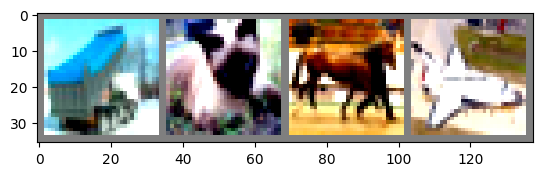

In [ ]:
#show images
imshow(torchvision.utils.make_grid(images))
#labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Training you PyTorch Model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F   # https://pytorch.org/docs/stable/nn.functional.html#torch-nn-functional
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

First it is needed to training test datasets. if you have not already, run the cell below to make sure the dataset is downloaded


In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

traindataloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                         shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
tesdataloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                            shuffle=False, num_workers=2)

classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

Check the output from `DataLoader`

 deer  deer truck   dog


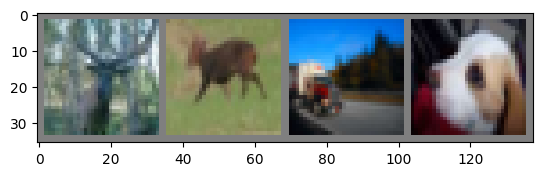

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img / 2 + 0.5   # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))

# get some random training imges
dataiter = iter(traindataloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
# The model to train, it is a variant of LeNet - discussed earlier - adapted for 3-color images

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3,6,5)  # nn.Conv2d(in_channels, out_channles, kernel_size, stride=1, padding=0, dilatation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)
    self.pool = nn.MaxPool2d(2,2)  # nn.MaxPool2d(kernel_size,stride=None,padding=0,dilation=1, return_indice=False, ceil_mode=False)  Applies a 2D maxpooling over an input signal composed of several input planes
    self.conv2 = nn.Conv2d(6,16,5) # Applies a 2D convolution over an input signal composed of several inputn planes
    self.fc1 = nn.Linear(16 * 5 *5, 120)  # Applies an affine linear transformation to the incoming data -- nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))  # get the conv1 -> execute the convolution, this output pass trough a ReLU activation, and the output of ReLU pass trough a MaxPool2d
    x = self.pool(F.relu(self.conv2(x)))  # twice
    x = x.view(-1,16*5*5)  #
    x = F.relu(self.fc1(x))  # F.relu = functional - use ReLU activation
    x = F.relu(self.fc2(x))
    x = self.fc3(x)

    return x




In [ ]:
net = Net()

print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


The las tingredients we need are a loss function and an optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

The loss function is a measure of how far from our ideal output the model's prediction was.
Cros-entropy loss is a typical loss function for classification models.

The **optimizer** is what drives the learning. SGD optmizer, `lr`

In [ ]:
# Training loop

for epoch in range(2):
  running_loss = 0.0

  for i, data in enumerate(traindataloader, 0):
    # get the inputs
    inputs, labels = data

    # zero the parameter gradient
    optimizer.zero_grad() # gradient acumulates over batches

    # forward + backward + optimize
    outputs = net(inputs)  # pass the data trhough the net
    loss = loss_fn(outputs, labels)  # calculate the loss - get loss function
    loss.backward()  # backpropagation
    optimizer.step()  # adjust the optimizer

    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999: # print every 2000 mini-batches
      print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss /2000))
      running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 2.202
[1,  4000] loss: 1.864
[1,  6000] loss: 1.677
[1,  8000] loss: 1.614
[1, 10000] loss: 1.544
[1, 12000] loss: 1.498
[2,  2000] loss: 1.429
[2,  4000] loss: 1.405
[2,  6000] loss: 1.371
[2,  8000] loss: 1.342
[2, 10000] loss: 1.312
[2, 12000] loss: 1.277
Finished Training


In [ ]:
correct = 0
total = 0

with torch.no_grad():
  for data in tesdataloader:  # get the test set
    images, labels = data  #get image and labels
    outputs = net(images)  #get the predicitons
    _, predicted = torch.max(outputs.data, 1)  #get the predicted tensor
    total += labels.size(0)
    correct += (predicted == labels).sum().item()  #compare the predicted with the ground truth, sum it and itemize

print('Accuracy on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy on the 10000 test images: 53 %


# Introduction to PyTorch Tensors

Tensors are the central data abstraction in PyTorch.

In [ ]:
import torch
import math

## Building Tensors

`torch.empty()`

In [ ]:
x = torch.empty(3,4)
print(type(x))
print(x)

<class 'torch.Tensor'>
tensor([[ 5.8516e-33,  0.0000e+00,  1.4013e-45,  0.0000e+00],
        [ 1.0971e-36,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 5.2665e-33,  0.0000e+00, -1.4626e-26,  4.5562e-41]])


Let's upack what we just did:

* We builded a tensor using one of the numerous factory methods attached to the `torch` module
* The tensor itself is 2-dimensional, having 3 rows and 4 columns
* The type of the object returned is `torch.Tensor`, which is an alias for `torch.FloatTensor`; By default PyTorch tensors are 32-bit floating point
* You will probabilly see some random-looking values when printing your tensor. The `torch.empty()` call allocates memory for the tensor, but not initialize it with any value.

A brief note about tensors and their number of dimensions, and terminology:

* You must sometimes see a 1-dimensional tensor called a *vector*
* Likewise, a 2-dimensional tensor is often referred to a *matrix*
* Anything with more than two dimensions is generally just called a *tensor*

More often than not, you will want to initialize your tensor with some value.

In [ ]:
zeros = torch.zeros(2,3)
print(zeros)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
ones = torch.ones(3,4)
print(ones)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [ ]:
torch.manual_seed(1325)
random = torch.rand(3,3)
print(random)

tensor([[0.1847, 0.9887, 0.4666],
        [0.4925, 0.6267, 0.5350],
        [0.5099, 0.4483, 0.3611]])


## Random Tensors and Slicing

`torch.manual_seeds()` assurance of reproducibility


In [ ]:
torch.manual_seed(125)
random1 = torch.rand(3,4)
print(random1)

tensor([[0.7219, 0.3854, 0.7279, 0.1047],
        [0.6605, 0.7745, 0.9334, 0.6147],
        [0.5578, 0.9899, 0.8673, 0.9288]])


In [ ]:
torch.manual_seed(125)
random2 = torch.rand(3,4)
print(random2)

tensor([[0.7219, 0.3854, 0.7279, 0.1047],
        [0.6605, 0.7745, 0.9334, 0.6147],
        [0.5578, 0.9899, 0.8673, 0.9288]])


## Tensor Shapes

Often, when you are performing operations on two or more tensors, they will need to be of the same *shape* - that is, having the same number of dimensions and the same number of cells in each dimension. For that, we have the `torch.*_like()` methods:

In [ ]:
x = torch.empty(2,2,3)
print(x.shape)
print(x)

torch.Size([2, 2, 3])
tensor([[[0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 1.4013e-45],
         [0.0000e+00, 0.0000e+00, 0.0000e+00]]])


In [ ]:
empty_like_x = torch.empty_like(x)
print(empty_like_x.shape)
print(empty_like_x)

torch.Size([2, 2, 3])
tensor([[[-2.0735e+10,  4.5562e-41,  8.7042e-34],
         [ 0.0000e+00,  5.8128e-34,  0.0000e+00]],

        [[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  1.1734e-33,  0.0000e+00]]])


In [ ]:
zeros_like_x = torch.zeros_like(x)
print(zeros_like_x.shape)
print(zeros_like_x)

torch.Size([2, 2, 3])
tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])


In [ ]:
rand_like_x = torch.rand_like(x)
print(rand_like_x.shape)
print(rand_like_x)

print("\n")

ones_like_x = torch.ones_like(x)
print(ones_like_x.shape)
print(ones_like_x)

torch.Size([2, 2, 3])
tensor([[[0.7116, 0.5952, 0.6835],
         [0.4139, 0.9702, 0.9073]],

        [[0.9727, 0.4030, 0.0068],
         [0.0175, 0.0490, 0.3330]]])


torch.Size([2, 2, 3])
tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])


The first new thing in the code and dell above is the use of `.shape` property in a tensor. This property contains a list of the extent of each dimension of a tensor.

Below that, we call the `empty_like()`, `zeros_like()`, `ones_like()`, and `rand_like()`, them `.shape` method check if each one return a tensor with the same dimensions of the 1st one.

The last way to build a tensor that will cover is to specify its data directly from a PyTorch collection:

In [ ]:
some_constants = torch.tensor([[3.14159, 2.71828], [1.61803,0.0072897]])
print(some_constants)

tensor([[3.1416, 2.7183],
        [1.6180, 0.0073]])


In [ ]:
some_integers = torch.tensor((2,3,5,7,9,17,19))
print(some_integers)

tensor([ 2,  3,  5,  7,  9, 17, 19])


In [ ]:
more_integers = torch.tensor(((2,4,6),[3,6,9]))
print(more_integers)

tensor([[2, 4, 6],
        [3, 6, 9]])


## Tensor Data Types

Setting the datatype of a tensor is possible a couple of ways:


In [ ]:
a = torch.ones((2,3), dtype=torch.int16)
print(a)

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


In [ ]:
b = torch.rand((2,3), dtype=torch.float64) * 20
print(b)

tensor([[13.4838, 15.3257, 14.1006],
        [13.0557, 18.6816, 12.9664]], dtype=torch.float64)


In [ ]:
c = b.to(torch.int32)
print(c)

tensor([[13, 15, 14],
        [13, 18, 12]], dtype=torch.int32)


## Math and Logic with PyTorch Tensors

In [ ]:
ones = torch.zeros(2,2) + 1
twos = torch.ones(2,2) * 2
threes = (torch.ones(2,2) * 7 -1) / 2
fours = twos ** 2
sqrt2s = twos ** 0.5

print(ones)
print("\n")
print(twos)
print("\n")
print(threes)
print("\n")
print(fours)
print("\n")
print(sqrt2s)

tensor([[1., 1.],
        [1., 1.]])


tensor([[2., 2.],
        [2., 2.]])


tensor([[3., 3.],
        [3., 3.]])


tensor([[4., 4.],
        [4., 4.]])


tensor([[1.4142, 1.4142],
        [1.4142, 1.4142]])


Similar operations between two tensor also behave like you would intuitively expect:

In [ ]:
powers2 = twos ** torch.tensor([[1,2],[3,4]])
print(powers2)

tensor([[ 2.,  4.],
        [ 8., 16.]])


In [ ]:
fives = ones + fours
print(fives)

tensor([[5., 5.],
        [5., 5.]])


In [ ]:
dozens = threes * fours
print(dozens)

tensor([[12., 12.],
        [12., 12.]])


## In Brief: Tensor Boradcasting

The exception to the same-shapes rule is *tensor broadcasting*.


In [ ]:
rand = torch.rand(2,4)
doubled = rand * (torch.ones(1,4) * 2)

print(rand)
print(doubled)

tensor([[0.7034, 0.6243, 0.2870, 0.4096],
        [0.3589, 0.8031, 0.3418, 0.8478]])
tensor([[1.4069, 1.2486, 0.5740, 0.8192],
        [0.7177, 1.6061, 0.6836, 1.6957]])


The rules for broadcasting are:

* Each tensor must have at least one dimension - no empty tensors
* Comparing the dimension sizs of the two tensors, *going from last o first*:
  * Each dimension must be equal, *or*
  * One of the dimensions must be of size 1, *or*
  * The dimension does not exist in one of the tensors

Tensors of identical shape, of course, are trivially "broadcastable"

In [ ]:
a = torch.ones(4,3,2)

b = a * torch.rand(3,2)  # 3rd and 2nd dims identical to a, dim 1 absent
print(b)

tensor([[[0.8821, 0.5835],
         [0.4660, 0.5411],
         [0.2206, 0.4123]],

        [[0.8821, 0.5835],
         [0.4660, 0.5411],
         [0.2206, 0.4123]],

        [[0.8821, 0.5835],
         [0.4660, 0.5411],
         [0.2206, 0.4123]],

        [[0.8821, 0.5835],
         [0.4660, 0.5411],
         [0.2206, 0.4123]]])


In [ ]:
c = a * torch.rand(3,1)
print(c)

tensor([[[0.9928, 0.9928],
         [0.8846, 0.8846],
         [0.8078, 0.8078]],

        [[0.9928, 0.9928],
         [0.8846, 0.8846],
         [0.8078, 0.8078]],

        [[0.9928, 0.9928],
         [0.8846, 0.8846],
         [0.8078, 0.8078]],

        [[0.9928, 0.9928],
         [0.8846, 0.8846],
         [0.8078, 0.8078]]])


In [ ]:
d = a * torch.rand(1,2)
print(d)

tensor([[[0.7427, 0.0572],
         [0.7427, 0.0572],
         [0.7427, 0.0572]],

        [[0.7427, 0.0572],
         [0.7427, 0.0572],
         [0.7427, 0.0572]],

        [[0.7427, 0.0572],
         [0.7427, 0.0572],
         [0.7427, 0.0572]],

        [[0.7427, 0.0572],
         [0.7427, 0.0572],
         [0.7427, 0.0572]]])


Look closely at the values of each tensor above:

* The multiplication operation that built `b` was broadcaast over every "layer" of `a`
* For `c`, the operation was broadcast over every layer and row of `a` -every 3-element column is identical.
* For `d`, we switched it around - now every *row* is identical, across layers and columns

## More Math with Tensors

PyTorch tensors have over three hundred operations that can be performed on them

In [ ]:
# common functions
a = torch.rand(2,4) *2 - 1
print("Common functions: ")
print(torch.abs(a))

Common functions: 
tensor([[0.0077, 0.0504, 0.5100, 0.9995],
        [0.9020, 0.0628, 0.4889, 0.3530]])


In [ ]:
print(torch.ceil(a))

tensor([[-0., 1., -0., 1.],
        [1., -0., -0., -0.]])


In [ ]:
print(torch.floor(a))

tensor([[-1.,  0., -1.,  0.],
        [ 0., -1., -1., -1.]])


In [ ]:
print(torch.clamp(a, -0.5, 0.5))

tensor([[-0.0077,  0.0504, -0.5000,  0.5000],
        [ 0.5000, -0.0628, -0.4889, -0.3530]])


In [ ]:
# trigonometric functions and their inverses
angles = torch.tensor([0, math.pi / 4, math.pi /2, 3 * math.pi /4])
print(angles)

tensor([0.0000, 0.7854, 1.5708, 2.3562])


In [ ]:
sines = torch.sin(angles)
print(sines)

tensor([0.0000, 0.7071, 1.0000, 0.7071])


In [ ]:
inverses = torch.asin(sines)
print(inverses)

tensor([0.0000, 0.7854, 1.5708, 0.7854])


In [ ]:
# bitwise operations
print("\nBitwise XOR: ")
b = torch.tensor([1,5,11])
c = torch.tensor([2,7,10])

print(b)
print("\n")
print(c)
print("\n")
print(torch.bitwise_xor(b,c))


Bitwise XOR: 
tensor([ 1,  5, 11])


tensor([ 2,  7, 10])


tensor([3, 2, 1])


In [ ]:
# comparisions
d = torch.tensor([[1., 2.],[3.,4.]])
e = torch.ones(1,2)
print(torch.eq(d,e))

tensor([[ True, False],
        [False, False]])


In [ ]:
# reductions
print(torch.max(d))  # single element tensor

tensor(4.)


In [ ]:
print(torch.max(d).item())

4.0


In [ ]:
print(torch.mean(d))

tensor(2.5000)


In [ ]:
print(torch.std(d))

tensor(1.2910)


In [ ]:
print(torch.prod(d))  #product of all numbers

tensor(24.)


In [ ]:
print(torch.unique(torch.tensor([1,2,1,2,1,2])))  # filter unique element

tensor([1, 2])


In [ ]:
# vector and linear algebra operations
v1 = torch.tensor([1.,0.,0.])
v2 = torch.tensor([0.,1.,0.])
m1 = torch.rand(2,2)
m2 = torch.tensor([[3.,0.], [0.,3.]])

print(torch.linalg.cross(v2, v1))  #negative of z unit vector (v1 x v2 == -v2 x v1)

tensor([ 0.,  0., -1.])


In [ ]:
print(m1)

tensor([[0.2126, 0.4554],
        [0.5411, 0.4905]])


In [ ]:
m3 = torch.linalg.matmul(m1,m2)
print(m3)

tensor([[0.6377, 1.3661],
        [1.6234, 1.4714]])


In [ ]:
print(torch.linalg.svd(m3))  # singular value decompostion

torch.return_types.linalg_svd(
U=tensor([[-0.5553, -0.8316],
        [-0.8316,  0.5553]]),
S=tensor([2.6141, 0.4894]),
Vh=tensor([[-0.6519, -0.7583],
        [ 0.7583, -0.6519]]))


## Altering Tensors in Place

Most binary operations on tensors will return a third new tensor. When we say `c = a * b`, the new tensor `c` will occupy a region of memory distinct from the other tensors.

There are times, though, that you may wish to alter a tensor in place - for example, if you are doing an element-wise computation where you can discard intermediate values. For this, most of the math functions have a version with an appended underscore (`_`) that will alter a tensor in place.

In [ ]:
a = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
print(a)

tensor([0.0000, 0.7854, 1.5708, 2.3562])


In [ ]:
print(torch.sin(a))  # this operation build a new tensor in memory

tensor([0.0000, 0.7071, 1.0000, 0.7071])


In [ ]:
print(a)  # a has not changed

tensor([0.0000, 0.7854, 1.5708, 2.3562])


In [ ]:
b = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
print(b)

tensor([0.0000, 0.7854, 1.5708, 2.3562])


In [ ]:
print(torch.sin_(b))

tensor([0.0000, 0.7071, 1.0000, 0.7071])


In [ ]:
print(b)  # b has changed

tensor([0.0000, 0.7071, 1.0000, 0.7071])


For arithmetic operations, there are functions that behave similary:

In [ ]:
a = torch.ones(2, 2)
b = torch.rand(2,2)

print(a)
print("\n")
print(b)

tensor([[1., 1.],
        [1., 1.]])


tensor([[0.9067, 0.5964],
        [0.9480, 0.0323]])


In [ ]:
print(a.add_(b))
print(a)
print(b)

tensor([[1.9067, 1.5964],
        [1.9480, 1.0323]])
tensor([[1.9067, 1.5964],
        [1.9480, 1.0323]])
tensor([[0.9067, 0.5964],
        [0.9480, 0.0323]])


In [ ]:
print(b.mul_(b))
print(b)

tensor([[0.8221, 0.3557],
        [0.8986, 0.0010]])
tensor([[0.8221, 0.3557],
        [0.8986, 0.0010]])


In [ ]:
a = torch.rand(2,2)
b = torch.rand(2,2)
c = torch.zeros(2,2)

old_id = id(c)  #

In [ ]:
print(c)


tensor([[0., 0.],
        [0., 0.]])


In [ ]:
d = torch.matmul(a,b, out=c)
print(c)

tensor([[1.0698, 1.1595],
        [0.3429, 0.4001]])


In [ ]:
assert c is d   # test c & d are the same object, not containing equal values
assert id(c) == old_id  # make sure that our new c is the same object as the old one

In [ ]:
torch.rand(2,2, out=c)
print(c)

tensor([[0.4296, 0.3178],
        [0.4992, 0.9284]])


In [ ]:
assert id(c) == old_id  # still the same object
print(c)

tensor([[0.4296, 0.3178],
        [0.4992, 0.9284]])


## Copying Tensors

As with any object in Python, assigning a tensor to a varible makes the variable a *label* of the tensor, and does not copy it. For example:

In [ ]:
a = torch.ones(2,2)
b = a

In [ ]:
a[0][1] = 561
print(b)

tensor([[  1., 561.],
        [  1.,   1.]])


But what if you want a separate copy of the data to work on? The `clone` method should be used:

In [ ]:
a = torch.ones(3,3)
b = a.clone()

print(a)
print(b)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [ ]:
assert b is not a   # different objects in memory
print(torch.eq(a,b))   # but still with the same contents

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])


In [ ]:
a[0][1] = 258
print(b)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


**There is an important thing to be aware of when using `clone()`**. If your source tensor has autograd, enabled then so will the clone. **This will be covered more deeply in the video on autograd**.

If your model has multiple computation paths in its `forward()` method, and *both* the original tensor and its clone contribute to the model's output, then to enable model learning you want autograd turned on for both tensors.

In [ ]:
a = torch.rand(3,3, requires_grad=True)  # turn on autograd
print(a)

tensor([[0.9296, 0.5939, 0.1371],
        [0.1972, 0.1117, 0.9535],
        [0.2096, 0.8589, 0.7376]], requires_grad=True)


In [ ]:
b = a.clone()
print(b)

tensor([[0.9296, 0.5939, 0.1371],
        [0.1972, 0.1117, 0.9535],
        [0.2096, 0.8589, 0.7376]], grad_fn=<CloneBackward0>)


In [ ]:
c = a.detach().clone()
print(c)

tensor([[0.9296, 0.5939, 0.1371],
        [0.1972, 0.1117, 0.9535],
        [0.2096, 0.8589, 0.7376]])


In [ ]:
print(a)

tensor([[0.9296, 0.5939, 0.1371],
        [0.1972, 0.1117, 0.9535],
        [0.2096, 0.8589, 0.7376]], requires_grad=True)


## Moving to Accelerator

One the major advanteges of PyTorch is its robust acceleration on an **accelerator** such as CUDA, MPS, MTIA, or XPU. How to move to faster hardware?

First check whether an accelerator is available, with the `is_available()` method.

In [ ]:
if torch.accelerator.is_available():
  print("We have an accelerator")
else:
  print("Only CPU")

Only CPU


Must put the data in someplace where the accelerator can see it. In CPU the data is in computer's RAM. The accelerator has attached memory to it. To performa a computation on a device, *all* the data must be moved  for that memory access to the computation on the device. **Moving the data to memory accessible by the accelerator**

In [ ]:
if torch.accelerator.is_available():
  gpu_rand = torch.rand(2,2, device=torch.accelerator.current_accelerator())
  print(gpu_rand)
else:
  print("Only CPU")

Only CPU


In [ ]:
the_device = torch.accelerator.current_accelerator() if torch.accelerator.is_available() else torch.device('cpu')
print("Device: {}".format(the_device))

Device: cpu


In [ ]:
x = torch.rand(2,2, device=the_device)
print(x)

tensor([[0.9392, 0.6402],
        [0.0835, 0.8189]])


It is important to know that in order to do computation involving two or more tensors, *all of the tensors must be on the same device**.

In [ ]:
x = torch.rand(3,3)
y = torch.rand(3,3) #, device = 'cuda')
z = x + y
print(z)

tensor([[1.5766, 0.6797, 0.6494],
        [0.4924, 1.4856, 0.9668],
        [1.0417, 1.1170, 0.9398]])


## Manipulating Tensor Shape

Some time is needed to change the shape of your tensor

### Changing the Number of Dimensions

One case you might need to change the number of dimensions is passing a single instance of input to your model.

image = 3 x 226 x 226 -> tensor of shape: `3,226,226` -The model is expecting input of shape `N, 3, 226, 266` - `N` is the batch number images

In [ ]:
d = torch.rand(3,226,226)
print(d)

tensor([[[0.3204, 0.8058, 0.0370,  ..., 0.2195, 0.2207, 0.7330],
         [0.8361, 0.3658, 0.6938,  ..., 0.9683, 0.3638, 0.2475],
         [0.5820, 0.2608, 0.6153,  ..., 0.7359, 0.8985, 0.1118],
         ...,
         [0.9496, 0.4388, 0.8936,  ..., 0.9678, 0.8317, 0.6429],
         [0.7641, 0.8809, 0.3937,  ..., 0.0847, 0.8107, 0.8816],
         [0.0609, 0.1981, 0.9407,  ..., 0.3599, 0.3107, 0.7289]],

        [[0.6043, 0.4600, 0.4547,  ..., 0.4690, 0.1008, 0.1081],
         [0.3463, 0.8656, 0.7683,  ..., 0.0406, 0.0699, 0.1389],
         [0.6053, 0.2353, 0.8936,  ..., 0.3387, 0.4694, 0.7640],
         ...,
         [0.6626, 0.5311, 0.5382,  ..., 0.9648, 0.0547, 0.2062],
         [0.5867, 0.5908, 0.7050,  ..., 0.8685, 0.2570, 0.2347],
         [0.0152, 0.3167, 0.4279,  ..., 0.7190, 0.9231, 0.6000]],

        [[0.6983, 0.9499, 0.7530,  ..., 0.4081, 0.7838, 0.8676],
         [0.9744, 0.2991, 0.6545,  ..., 0.6733, 0.6091, 0.5449],
         [0.8270, 0.8316, 0.7049,  ..., 0.0496, 0.9466, 0.

In [ ]:
e = d.unsqueeze(0)

print(d.shape)
print(e.shape)

torch.Size([3, 226, 226])
torch.Size([1, 3, 226, 226])


The `unsqueeze()` method adds a dimension of extent 1. `unsqueeze(0) adds it as a new zeroth dimension - now you have a batch of one.

So if that's *uns*queezing? What do we mean by squeezing? We are taking advantage of the fact that any dimension of extent 1 *does not* change the number of elements in the tensor.

In [ ]:
f = torch.rand(1,1,1,1,1)
print(f)

tensor([[[[[0.6776]]]]])


In [ ]:
g = torch.rand(1,20)
print(g.shape)
print(g)

torch.Size([1, 20])
tensor([[0.8323, 0.2391, 0.2215, 0.4867, 0.6418, 0.4243, 0.4272, 0.3588, 0.3616,
         0.0756, 0.7566, 0.7580, 0.5265, 0.0769, 0.3226, 0.2676, 0.1703, 0.0250,
         0.1297, 0.1785]])


In [ ]:
h = g.squeeze(0)
print(h.shape)
print(h)

torch.Size([20])
tensor([0.8323, 0.2391, 0.2215, 0.4867, 0.6418, 0.4243, 0.4272, 0.3588, 0.3616,
        0.0756, 0.7566, 0.7580, 0.5265, 0.0769, 0.3226, 0.2676, 0.1703, 0.0250,
        0.1297, 0.1785])


In [ ]:
i = torch.rand(2,2)
print(i.shape)
print(i)

torch.Size([2, 2])
tensor([[0.9845, 0.7858],
        [0.0054, 0.8430]])


In [ ]:
j = i.squeeze(0)
print(j.shape)

torch.Size([2, 2])


You may only `squeeze()` dimensions of extend 1.

Calls to `squeeze()` and `unsqueeze()` can only act on dimensions of extent 1 because to do otherwise would change the number of elements in the tensor.

In [ ]:
k = torch.ones(4,3,2)
print(k)

tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])


In [ ]:
l = k * torch.rand(3,1)
print(l)

tensor([[[0.1269, 0.1269],
         [0.0603, 0.0603],
         [0.5838, 0.5838]],

        [[0.1269, 0.1269],
         [0.0603, 0.0603],
         [0.5838, 0.5838]],

        [[0.1269, 0.1269],
         [0.0603, 0.0603],
         [0.5838, 0.5838]],

        [[0.1269, 0.1269],
         [0.0603, 0.0603],
         [0.5838, 0.5838]]])


In [ ]:
m = torch.ones(4,3,2)
n = torch.rand(3)
o = n.unsqueeze(1)

print(m)
print(n)
print(o)
print(o.shape)
print(m * o)

tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])
tensor([0.5477, 0.1734, 0.5365])
tensor([[0.5477],
        [0.1734],
        [0.5365]])
torch.Size([3, 1])
tensor([[[0.5477, 0.5477],
         [0.1734, 0.1734],
         [0.5365, 0.5365]],

        [[0.5477, 0.5477],
         [0.1734, 0.1734],
         [0.5365, 0.5365]],

        [[0.5477, 0.5477],
         [0.1734, 0.1734],
         [0.5365, 0.5365]],

        [[0.5477, 0.5477],
         [0.1734, 0.1734],
         [0.5365, 0.5365]]])


The `squeeze()` and `unsqueeze()` methods also hevwe in-place versions `squeeze_()` and `unsqueeze_()`

In [ ]:
batch_me = torch.rand(3,226,226)
print(batch_me.shape)

torch.Size([3, 226, 226])


In [ ]:
batch_me.unsqueeze_(0)
print(batch_me.shape)

torch.Size([1, 3, 226, 226])


Change the shape of a tensor more radically, while still preserving the number of elements and their contents. One case whre this happens is at the interface between a convolutional layer of a model and a linear layer of the model - this is common in image classification models. A convolutional kernel will yield an output tensor of shape *features x width x height*, but the following layer expects a 1-dimensional input. `reshape()` will do this for you, provided tha the dimensions you request yield the same number of elements as the input tensor has.

In [ ]:
output3d = torch.rand(6,20,20)
print(output3d.shape)

torch.Size([6, 20, 20])


In [ ]:
input1d = output3d.reshape( 6 * 20 * 20)
print(input1d.shape)

torch.Size([2400])


In [ ]:
# can also call it as a method on the torhc module
print(torch.reshape(output3d, (6*20*20,)).shape)

torch.Size([2400])


## NumPy Bridge


In [ ]:
import numpy as np

numpy_array = np.ones((2,3))
print(numpy_array)

[[1. 1. 1.]
 [1. 1. 1.]]


In [ ]:
pytorch_tensor = torch.from_numpy(numpy_array)
print(pytorch_tensor)

tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [ ]:
rand_pytorch = torch.rand(3,4)
print(rand_pytorch)

tensor([[0.3954, 0.0095, 0.8254, 0.8930],
        [0.1860, 0.0600, 0.3284, 0.9694],
        [0.8756, 0.2252, 0.5117, 0.7928]])


In [ ]:
rand_numpy = rand_pytorch.numpy()
print(rand_numpy)

[[0.39537996 0.00950062 0.82537323 0.8929838 ]
 [0.18599337 0.06004375 0.32843876 0.9694138 ]
 [0.87563914 0.22523832 0.5117328  0.7928024 ]]


It is important to know that these converted objects are using *the same underlying memory* as their source objects, meaning that changes to one are reflected in the other.

In [ ]:
numpy_array[1,1] = 23
print(pytorch_tensor)

tensor([[ 1.,  1.,  1.],
        [ 1., 23.,  1.]], dtype=torch.float64)


In [ ]:
rand_pytorch[1,1] = 18
print(rand_numpy)

[[3.9537996e-01 9.5006227e-03 8.2537323e-01 8.9298379e-01]
 [1.8599337e-01 1.8000000e+01 3.2843876e-01 9.6941382e-01]
 [8.7563914e-01 2.2523832e-01 5.1173282e-01 7.9280239e-01]]
